<a href="https://colab.research.google.com/github/Arju-Jawla/Work-on-Significant-Wave-Height-data-for-2022-and-23/blob/main/SWH(22_23)_07_Seasonal_Climatology_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import Required Libraries

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 79.1 MB/s eta 0:00:00


In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
import warnings
# Suppress Cartopy download warnings
warnings.filterwarnings("ignore", category=UserWarning, module="cartopy")

## 2. Load the Seasonal files

In [3]:
# Load seasonal files
ds_djf = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_DJFmean_22_23.nc')
ds_mam = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_MAMmean_22_23.nc')
ds_jja = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_JJAmean_22_23.nc')
ds_son = xr.open_dataset('/content/drive/MyDrive/Project Learnings/Data/Reanalysis_swsh_SONmean_22_23.nc')

## 2.1 Extract data

In [6]:
# Extract the SWH variable
swh_djf = ds_djf['swh']
swh_mam = ds_mam['swh']
swh_jja = ds_jja['swh']
swh_son = ds_son['swh']

## 3. Climatology Plots

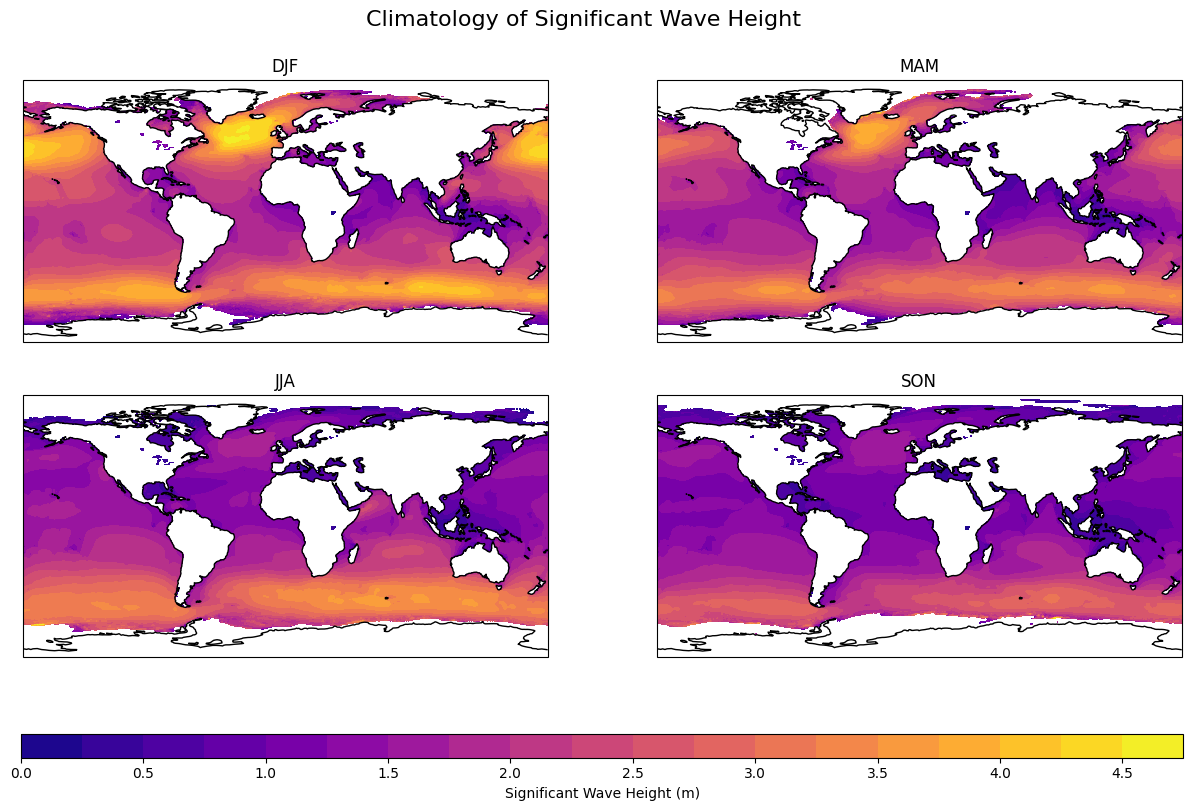

In [15]:
# Create a 2x2 subplot with shared colorbar
fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
seasons = ['DJF', 'MAM', 'JJA', 'SON']
data = [swh_djf, swh_mam, swh_jja, swh_son]
cmaps = ['plasma', 'plasma', 'plasma', 'plasma']
ax_titles = ['DJF', 'MAM', 'JJA', 'SON']

# Plot each season
contours = []
for ax, season, swh, cmap, title in zip(axes.flatten(), seasons, data, cmaps, ax_titles):
    contour = ax.contourf(swh['longitude'], swh['latitude'], swh, levels=20, cmap=cmap, transform=ccrs.PlateCarree())
    contours.append(contour)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add a shared colorbar
cbar = fig.colorbar(contours[0], ax=axes, orientation='horizontal', pad=0.1, aspect=50)
cbar.set_label('Significant Wave Height (m)')

# Set main title
plt.suptitle('Climatology of Significant Wave Height', fontsize=16, y=0.95)

plt.show()